<a href="https://colab.research.google.com/github/yashveersinghsohi/Car_Price_Prediction/blob/master/EDA/CarPrice_00_Preliminary_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib.ticker import PercentFormatter

# Data

In [2]:
root_dir = "https://raw.githubusercontent.com/yashveersinghsohi/Car_Price_Prediction/master/Data/"
data_path = root_dir + "train.csv"
data = pd.read_csv(data_path)

In [3]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


# Preliminary EDA

## Data dimensions

Shape of dataframes

In [4]:
data.shape

(19237, 18)

Comparing column names

In [5]:
data.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

## Column Data Types

Data types of columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

Numerical and Object data type columns.

In [7]:
num_features = ["Prod. year", "Cylinders", "Airbags"]
obj_features = ["Levy", "Manufacturer", "Model", 
                "Category", "Leather interior", 
                "Fuel type", "Engine volume", "Mileage", 
                "Gear box type", "Drive wheels", "Doors", 
                "Wheel", "Color"]
target_features = ["Price"]

Description stats for Numerical data

In [8]:
data[num_features].describe()

,Prod. year,Cylinders,Airbags
count,19237.000000,19237.000000,19237.000000
mean,2010.912824,4.582991,6.582627
std,5.668673,1.199933,4.320168
min,1939.000000,1.000000,0.000000
25%,2009.000000,4.000000,4.000000
50%,2012.000000,4.000000,6.000000
75%,2015.000000,4.000000,12.000000
max,2020.000000,16.000000,16.000000


# Splitting data

In [9]:
data_og = data.copy()
features = data[num_features+obj_features]
targets = data[target_features]

In [10]:
features.shape, targets.shape

((19237, 16), (19237, 1))

In [11]:
# 90% data for training and hold out validation set
# 10% of data for testing
train_val_features, test_features, train_val_targets, test_targets = train_test_split(
                                                              features, targets, 
                                                              random_state=42, 
                                                              test_size=0.1
                                                            )

# 80% of training and hold out validation set for training 
# 20% of training and hold out validation set for validation
train_features, val_features, train_targets, val_targets = train_test_split(
                                                              train_val_features, train_val_targets, 
                                                              random_state=42, 
                                                              test_size=0.2
                                                            )

print(f"Train Features: {train_features.shape}")
print(f"Train Targets: {train_targets.shape}", end="\n\n")

print(f"Validation Features: {val_features.shape}")
print(f"Validation Targets: {val_targets.shape}", end="\n\n")

print(f"Test Features: {test_features.shape}")
print(f"Test Targets: {test_targets.shape}", end="\n\n")

Train Features: (13850, 16)
Train Targets: (13850, 1)

Validation Features: (3463, 16)
Validation Targets: (3463, 1)

Test Features: (1924, 16)
Test Targets: (1924, 1)



# Univariate EDA

## Numerical data types

In [12]:
num_features

['Prod. year', 'Cylinders', 'Airbags']

### Prod. year

% of Number of records for each year

In [13]:
(train_features["Prod. year"].value_counts().sort_index()/train_features["Prod. year"].shape[0]) * 100

1939     0.021661
1953     0.021661
1957     0.007220
1964     0.014440
1965     0.014440
1968     0.007220
1973     0.007220
1974     0.014440
1976     0.007220
1978     0.007220
1980     0.014440
1981     0.007220
1982     0.007220
1983     0.014440
1984     0.036101
1985     0.028881
1986     0.036101
1987     0.021661
1988     0.057762
1989     0.036101
1990     0.079422
1991     0.050542
1992     0.137184
1993     0.101083
1994     0.187726
1995     0.534296
1996     0.534296
1997     0.779783
1998     1.119134
1999     1.046931
2000     1.588448
2001     1.364621
2002     1.516245
2003     1.862816
2004     1.935018
2005     2.079422
2006     1.732852
2007     2.404332
2008     3.754513
2009     2.967509
2010     7.877256
2011     8.173285
2012    11.350181
2013    10.115523
2014    11.270758
2015     8.115523
2016     7.718412
2017     4.823105
2018     2.483755
2019     1.646209
2020     0.267148
Name: Prod. year, dtype: float64

Bar graph showing number of records observed each year.

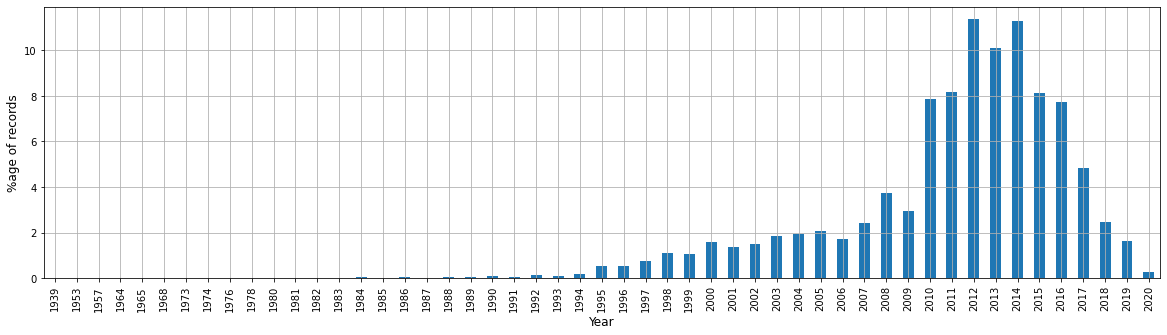

In [14]:
fig, ax = plt.subplots(figsize=(20, 5))
temp_series = (train_features["Prod. year"].value_counts().sort_index()/train_features["Prod. year"].shape[0]) * 100
temp_series.plot.bar(ax=ax)

ax.grid()
ax.set_xlabel("Year", size=12)
ax.set_ylabel("%age of records", size=12)
plt.show()

Paraeto graph

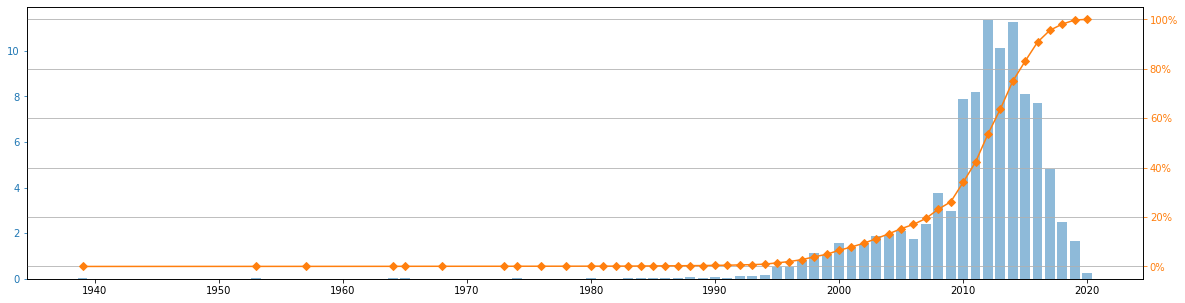

In [15]:
fig, ax = plt.subplots(figsize=(20, 5))
temp_series = (train_features["Prod. year"].value_counts().sort_index()/train_features["Prod. year"].shape[0]) * 100

# Bar Plot
ax.bar(temp_series.index, temp_series.to_numpy(), alpha=0.5)

# Paraeto Graph
ax2 = ax.twinx()
ax2.plot(temp_series.cumsum(), color="C1", marker="D")

ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.tick_params(axis="y", colors="C1")
ax.tick_params(axis="y", colors="C0")

ax2.grid()
plt.show()

### Cylinders

Number of cars with each category of `Cylinders`

In [16]:
temp_series = train_features["Cylinders"].value_counts().sort_index()

temp_df = pd.DataFrame(
  np.c_[
        temp_series.index, 
        temp_series.to_numpy(), 
        (temp_series.to_numpy()/train_features["Cylinders"].shape[0])*100
      ], 
  columns=["Cylinders", "Value_Counts", "%age_Value_Counts"])
temp_df

,Cylinders,Value_Counts,%age_Value_Counts
0,1.0,28.0,0.202166
1,2.0,34.0,0.245487
2,3.0,81.0,0.584838
3,4.0,10342.0,74.671480
4,5.0,124.0,0.895307
5,6.0,2500.0,18.050542
6,7.0,2.0,0.014440
7,8.0,702.0,5.068592
8,10.0,9.0,0.064982
9,12.0,24.0,0.173285


Bar graphs for number of cars of each `Cylinders` category

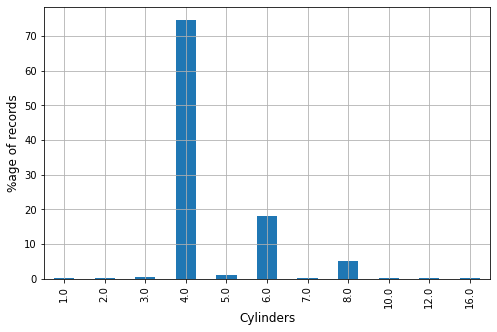

In [17]:
fig, ax = plt.subplots(figsize=(8, 5))
temp_df["%age_Value_Counts"].plot.bar(ax=ax)

ax.grid()
ax.set_xticklabels(temp_df["Cylinders"])
ax.set_xlabel("Cylinders", size=12)
ax.set_ylabel("%age of records", size=12)
plt.show()

### Airbags

Value Counts

In [18]:
temp_series = train_features["Airbags"].value_counts().sort_index()

temp_df = pd.DataFrame(
  np.c_[
        temp_series.index, 
        temp_series.to_numpy(), 
        (temp_series.to_numpy()/train_features.shape[0])*100
  ], 
  columns = ["Airbags", "Value_COunts", "%age_Value_Counts"]
)
temp_df

,Airbags,Value_COunts,%age_Value_Counts
0,0.0,1745.0,12.599278
1,1.0,53.0,0.382671
2,2.0,739.0,5.335740
3,3.0,30.0,0.216606
4,4.0,4229.0,30.534296
5,5.0,76.0,0.548736
6,6.0,908.0,6.555957
7,7.0,64.0,0.462094
8,8.0,1125.0,8.122744
9,9.0,44.0,0.317690


Bar graph

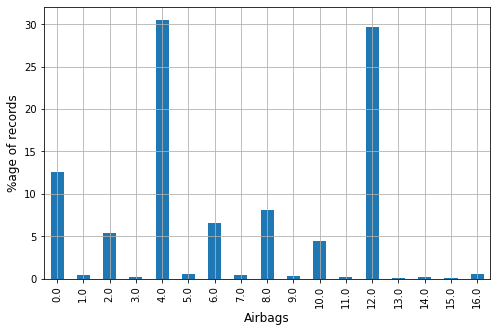

In [19]:
fig, ax = plt.subplots(figsize=(8, 5))
temp_df["%age_Value_Counts"].plot.bar(ax=ax)

ax.grid()
ax.set_xticklabels(temp_df["Airbags"])
ax.set_xlabel("Airbags", size=12)
ax.set_ylabel("%age of records", size=12)
plt.show()

## Object Data Type

In [20]:
obj_features

['Levy',
 'Manufacturer',
 'Model',
 'Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Mileage',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color']

### Levy

Number of Null values in this column. Here the Null values are given by `"-"` sign.

In [21]:
train_features[train_features["Levy"] == "-"].shape

(4225, 16)

%age of Null values

In [22]:
(train_features[train_features["Levy"] == "-"].shape[0]/train_features.shape[0])*100

30.505415162454874

Removing Null values

In [23]:
temp_df = pd.DataFrame(
  train_features[train_features["Levy"] != "-"]["Levy"].astype(np.uint), 
  columns=["Levy"]
)
print(temp_df.shape)
temp_df.head()

(9625, 1)


,Levy
1678,308
14501,687
6858,891
7634,697
7331,765


Histogram and Box Plots

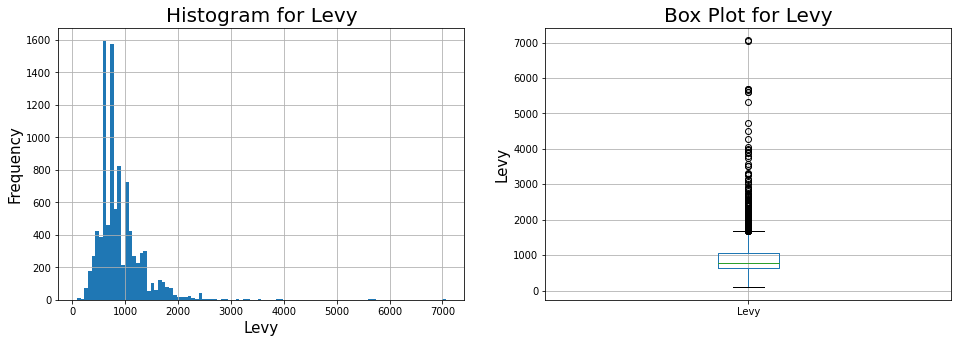

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
temp_df["Levy"].plot.hist(ax=ax[0], bins=100)
ax[0].set_xlabel("Levy", size=15)
ax[0].set_ylabel("Frequency", size=15)
ax[0].set_title("Histogram for Levy", size=20)
ax[0].grid()

temp_df[["Levy"]].boxplot(ax=ax[1])
ax[1].set_ylabel("Levy", size=15)
ax[1].set_title("Box Plot for Levy", size=20)
plt.show()

### Manufacturer

In [25]:
train_features["Manufacturer"].unique()

array(['LEXUS', 'MERCEDES-BENZ', 'DAEWOO', 'HYUNDAI', 'VOLKSWAGEN',
       'OPEL', 'NISSAN', 'SSANGYONG', 'KIA', 'FORD', 'TOYOTA', 'JEEP',
       'BMW', 'HONDA', 'MITSUBISHI', 'LAND ROVER', 'MINI', 'MAZDA',
       'CHEVROLET', 'SUBARU', 'PORSCHE', 'DODGE', 'AUDI', 'VAZ', 'JAGUAR',
       'LINCOLN', 'SUZUKI', 'MASERATI', 'FIAT', 'MERCURY', 'RENAULT',
       'INFINITI', 'CHRYSLER', 'CADILLAC', 'ACURA', 'SKODA', 'CITROEN',
       'GAZ', 'DAIHATSU', 'VOLVO', 'SCION', 'PEUGEOT', 'BUICK', 'GMC',
       'ROVER', 'MOSKVICH', 'სხვა', 'ISUZU', 'ROLLS-ROYCE', 'BENTLEY',
       'UAZ', 'ALFA ROMEO', 'ZAZ', 'PONTIAC', 'FERRARI', 'ASTON MARTIN',
       'GREATWALL', 'HUMMER', 'TESLA', 'SEAT'], dtype=object)

In [26]:
temp_series = train_features["Manufacturer"].value_counts()
temp_df = pd.DataFrame(
  np.c_[
        temp_series.index, 
        temp_series.to_numpy(), 
        (temp_series.to_numpy()/train_features.shape[0])*100
  ],
  columns=["Manufacturer", "Value_counts", "%age_Value_counts"]
)
print(temp_df.shape)
temp_df.head()

(60, 3)


,Manufacturer,Value_counts,%age_Value_counts
0,HYUNDAI,2729,19.704
1,TOYOTA,2613,18.8664
2,MERCEDES-BENZ,1512,10.917
3,FORD,795,5.74007
4,CHEVROLET,779,5.62455


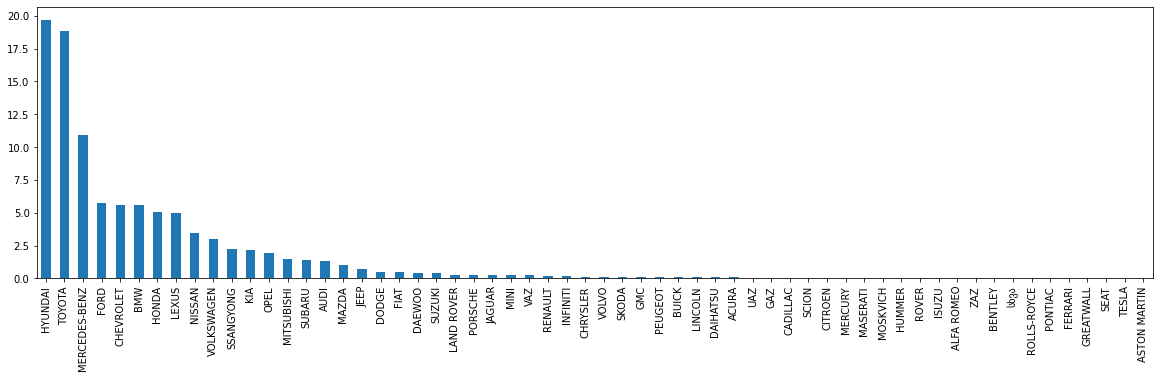

In [27]:
fig, ax = plt.subplots(figsize=(20, 5))
temp_df["%age_Value_counts"].plot.bar(ax=ax)
ax.set_xticklabels(temp_df["Manufacturer"])
plt.show()

### Model

In [28]:
train_features["Model"].nunique()

1315

In [29]:
temp_series = train_features["Model"].value_counts()
temp_df = pd.DataFrame(
  np.c_[
        temp_series.index, 
        temp_series.to_numpy(), 
        (temp_series.to_numpy()/train_features.shape[0])*100
  ],
  columns=["Model", "Value_counts", "%age_Value_counts"]
)
print(temp_df.shape)
temp_df.head()

(1315, 3)


,Model,Value_counts,%age_Value_counts
0,Sonata,786,5.67509
1,Prius,775,5.59567
2,Camry,679,4.90253
3,Elantra,666,4.80866
4,E 350,400,2.88809


Bar graph for some of the most common models (>1% occurance)

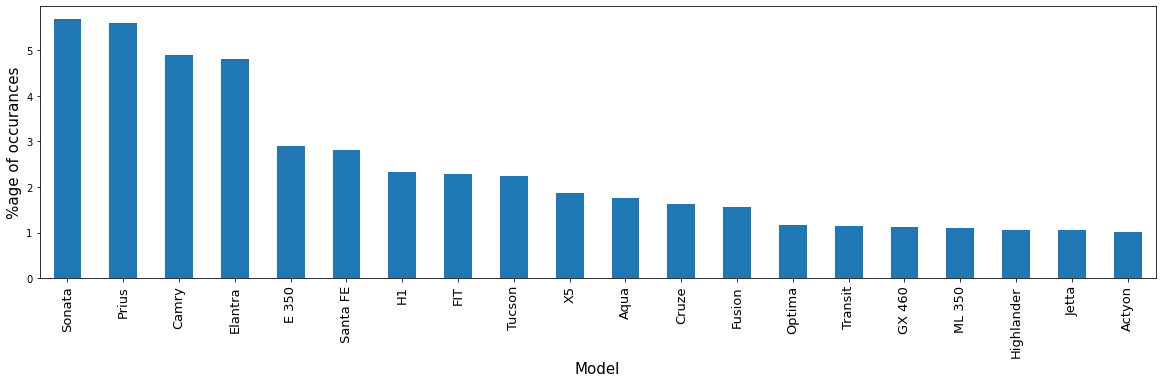

In [30]:
fig, ax = plt.subplots(figsize=(20, 5))
temp_df[temp_df["%age_Value_counts"]>1]["%age_Value_counts"].plot.bar(ax=ax)

ax.set_xlabel("Model", size=15)
ax.set_ylabel("%age of occurances", size=15)
ax.set_xticklabels(temp_df["Model"], fontdict={"fontsize": 13})
plt.show()

### Category

In [31]:
temp_series = train_features["Category"].value_counts()
temp_df = pd.DataFrame(
  np.c_[
        temp_series.index, 
        temp_series.to_numpy(), 
        (temp_series.to_numpy()/train_features.shape[0])*100
      ],
  columns = ["Category", "Value_counts", "%age_Value_counts"]
  )

temp_df

,Category,Value_counts,%age_Value_counts
0,Sedan,6305,45.5235
1,Jeep,3918,28.2888
2,Hatchback,2054,14.8303
3,Minivan,469,3.38628
4,Coupe,391,2.8231
5,Universal,258,1.86282
6,Microbus,222,1.60289
7,Goods wagon,159,1.14801
8,Pickup,40,0.288809
9,Cabriolet,27,0.194946


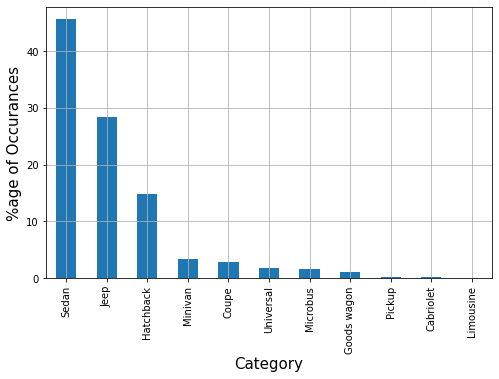

In [32]:
fig, ax = plt.subplots(figsize=(8, 5))
temp_df["%age_Value_counts"].plot.bar(ax=ax)

ax.set_xlabel("Category", size=15)
ax.set_ylabel("%age of Occurances", size=15)

ax.set_xticklabels(temp_df["Category"])
ax.grid()
plt.show()

### Leather interior

In [33]:
train_features["Leather interior"].value_counts()

Yes    10089
No      3761
Name: Leather interior, dtype: int64

In [34]:
(train_features["Leather interior"].value_counts()/train_features.shape[0])*100

Yes    72.844765
No     27.155235
Name: Leather interior, dtype: float64

### Fuel type

In [35]:
temp_series = train_features["Fuel type"].value_counts()
temp_df = pd.DataFrame(
  np.c_[
        temp_series.index, 
        temp_series.to_numpy(), 
        (temp_series.to_numpy()/train_features.shape[0])*100
      ],
  columns = ["Fuel_Type", "Value_counts", "%age_Value_counts"]
)

temp_df

,Fuel_Type,Value_counts,%age_Value_counts
0,Petrol,7295,52.6715
1,Diesel,2937,21.2058
2,Hybrid,2556,18.4549
3,LPG,650,4.69314
4,CNG,356,2.5704
5,Plug-in Hybrid,56,0.404332


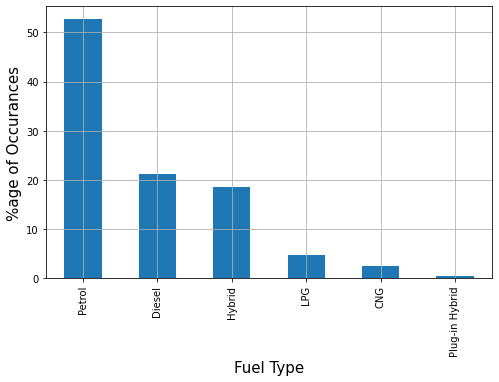

In [36]:
fig, ax = plt.subplots(figsize=(8, 5))
temp_df["%age_Value_counts"].plot.bar(ax=ax)

ax.set_xlabel("Fuel Type", size=15)
ax.set_ylabel("%age of Occurances", size=15)
ax.set_xticklabels(temp_df["Fuel_Type"])

ax.grid()
plt.show()

### Engine volume

In [37]:
turbo_idx = train_features["Engine volume"].str.contains("Turbo")
temp_series = train_features["Engine volume"]
temp_series = temp_series.str.replace(" Turbo", "").astype(np.float)

temp_df = pd.DataFrame(
    np.c_[
          temp_series.to_numpy(), 
          turbo_idx.to_numpy()
        ], 
    columns = ["Engine_volume", "Turbo"]
  )
temp_df["Turbo"] = temp_df["Turbo"].astype(np.uint)
print(temp_df.shape)
temp_df.head()

(13850, 2)


,Engine_volume,Turbo
0,1.8,0
1,3.2,0
2,1.6,0
3,2.0,0
4,2.0,0


In [38]:
temp_df["Turbo"].value_counts()

0    12472
1     1378
Name: Turbo, dtype: int64

In [39]:
temp_df[temp_df["Turbo"] == 1]["Engine_volume"].describe()

count    1378.000000
mean        2.272134
std         0.781071
min         0.200000
25%         1.800000
50%         2.000000
75%         2.700000
max         6.300000
Name: Engine_volume, dtype: float64

In [40]:
temp_df[temp_df["Turbo"] == 0]["Engine_volume"].describe()

count    12472.000000
mean         2.310343
std          0.889273
min          0.000000
25%          1.800000
50%          2.000000
75%          2.500000
max         20.000000
Name: Engine_volume, dtype: float64

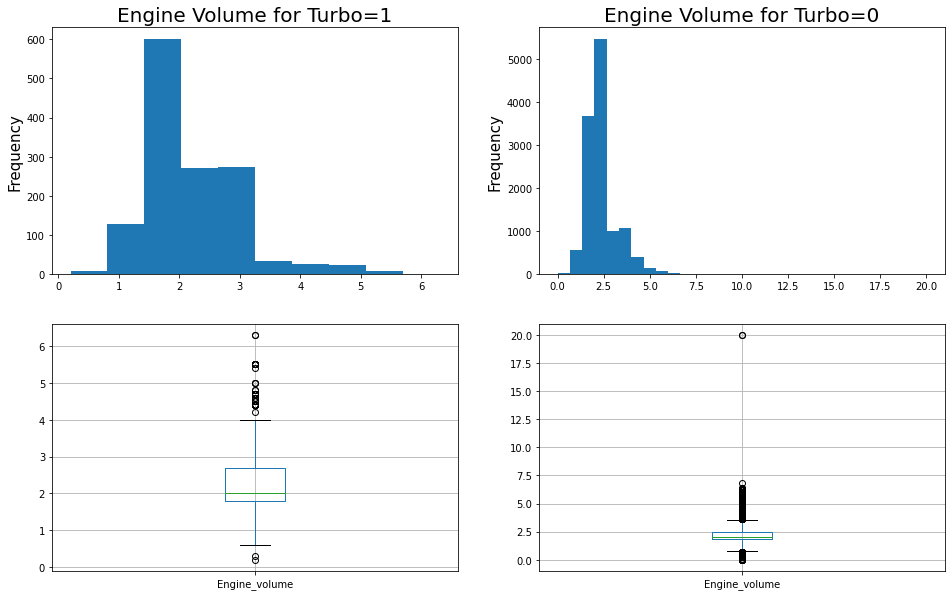

In [41]:
fig, ax = plt.subplots(2, 2, figsize=(16, 10))

temp_df[temp_df["Turbo"] == 1]["Engine_volume"].plot.hist(ax=ax[0, 0])
ax[0, 0].set_ylabel("Frequency", size=15)
ax[0, 0].set_title("Engine Volume for Turbo=1", size=20)

temp_df[temp_df["Turbo"] == 0]["Engine_volume"].plot.hist(ax=ax[0, 1], bins=30)
ax[0, 1].set_ylabel("Frequency", size=15)
ax[0, 1].set_title("Engine Volume for Turbo=0", size=20)

temp_df[temp_df["Turbo"] == 1][["Engine_volume"]].boxplot(ax=ax[1, 0])
temp_df[temp_df["Turbo"] == 0][["Engine_volume"]].boxplot(ax=ax[1, 1])

plt.show()

### Mileage

In [42]:
temp_df = pd.DataFrame(
  train_features["Mileage"].str.replace(" km", "").astype(np.uint), 
  columns = ["Mileage"]
)
print(temp_df.shape)
temp_df.head()

(13850, 1)


,Mileage
1678,192000
3431,220000
14501,140000
16666,305125
6858,102313


In [43]:
temp_df["Mileage"].describe()

count    1.385000e+04
mean     1.765641e+06
std      5.269560e+07
min      0.000000e+00
25%      7.099550e+04
50%      1.270000e+05
75%      1.890000e+05
max      2.147484e+09
Name: Mileage, dtype: float64

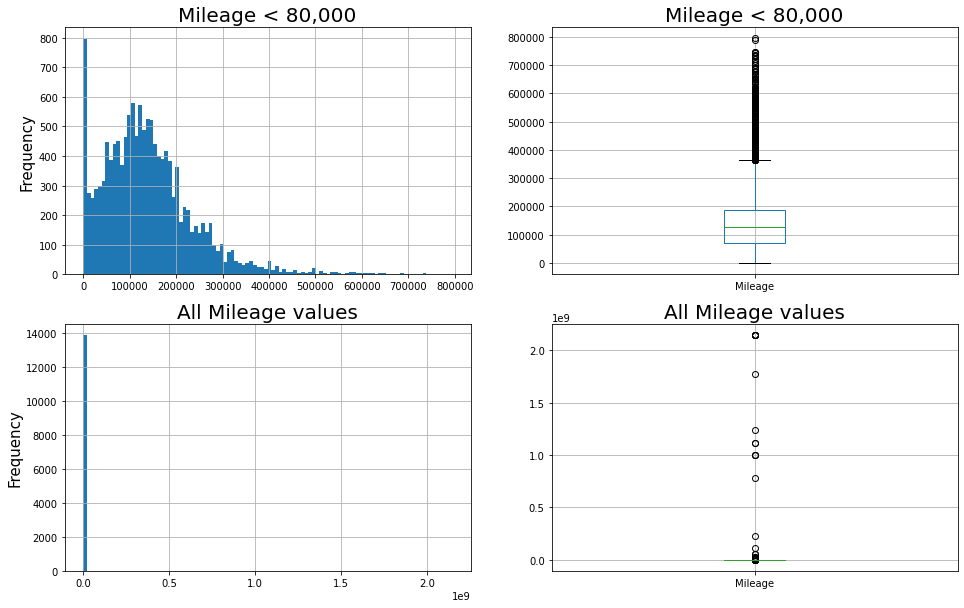

In [44]:
fig, ax = plt.subplots(2, 2, figsize=(16, 10))

temp_df[temp_df["Mileage"] < 8e+05]["Mileage"].plot.hist(bins=100, ax=ax[0, 0])
ax[0, 0].set_ylabel("Frequency", size=15)
ax[0, 0].set_title("Mileage < 80,000", size=20)
ax[0, 0].grid()

temp_df[temp_df["Mileage"] < 8e+05][["Mileage"]].boxplot(ax=ax[0, 1])
ax[0, 1].set_title("Mileage < 80,000", size=20)

temp_df["Mileage"].plot.hist(bins=100, ax=ax[1, 0])
ax[1, 0].set_ylabel("Frequency", size=15)
ax[1, 0].set_title("All Mileage values", size=20)
ax[1, 0].grid()

temp_df[["Mileage"]].boxplot(ax=ax[1, 1])
ax[1, 1].set_title("All Mileage values", size=20)

plt.show()

### Gear box type

In [45]:
temp_series  = train_features["Gear box type"].value_counts()
temp_df = pd.DataFrame(
  np.c_[
        temp_series.index,
        temp_series.to_numpy(), 
        (temp_series.to_numpy()/train_features.shape[0])*100
  ], 
  columns=["Gear_box_type", "Value_counts", "%age_Value_counts"]
)
temp_df

,Gear_box_type,Value_counts,%age_Value_counts
0,Automatic,9734,70.2816
1,Tiptronic,2243,16.1949
2,Manual,1340,9.67509
3,Variator,533,3.84838


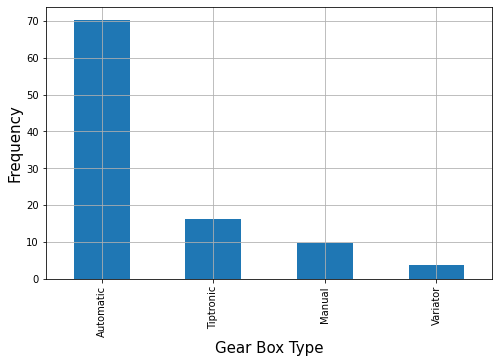

In [46]:
fig, ax = plt.subplots(figsize=(8, 5))
temp_df["%age_Value_counts"].plot.bar(ax=ax)
ax.set_xlabel("Gear Box Type", size=15)
ax.set_ylabel("Frequency", size=15)
ax.set_xticklabels(temp_df["Gear_box_type"])
ax.grid()
plt.show()

### Drive wheels

In [47]:
temp_series = train_features["Drive wheels"].value_counts()
temp_df = pd.DataFrame(
  np.c_[
        temp_series.index,
        temp_series.to_numpy(), 
        (temp_series.to_numpy()/train_features.shape[0])*100
  ], 
  columns=["Drive_wheels", "Value_counts", "%age_Value_counts"]
)
temp_df

,Drive_wheels,Value_counts,%age_Value_counts
0,Front,9277,66.9819
1,4x4,2886,20.8375
2,Rear,1687,12.1805


### Doors

In [48]:
(train_features["Doors"].value_counts()/train_features.shape[0])*100

04-May    95.220217
02-Mar     4.000000
>5         0.779783
Name: Doors, dtype: float64

### Wheel

In [49]:
(train_features["Wheel"].value_counts()/train_features.shape[0])*100

Left wheel          92.281588
Right-hand drive     7.718412
Name: Wheel, dtype: float64

### Color

In [50]:
temp_series = train_features["Color"].value_counts()
temp_df = pd.DataFrame(
  np.c_[
        temp_series.index,
        temp_series.to_numpy(), 
        (temp_series.to_numpy()/train_features.shape[0])*100
  ], 
  columns=["Color", "Value_counts", "%age_Value_counts"]
)
temp_df

,Color,Value_counts,%age_Value_counts
0,Black,3624,26.1661
1,White,3220,23.2491
2,Silver,2787,20.1227
3,Grey,1679,12.1227
4,Blue,994,7.1769
5,Red,460,3.3213
6,Green,233,1.68231
7,Orange,190,1.37184
8,Brown,132,0.953069
9,Carnelian red,119,0.859206


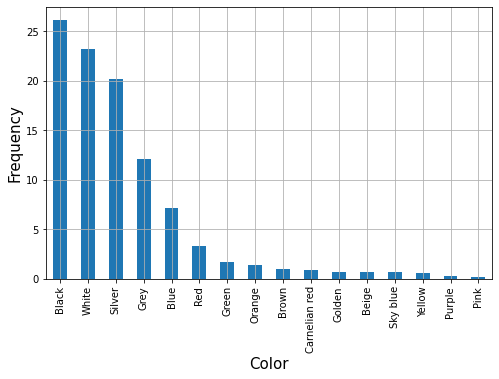

In [51]:
fig, ax = plt.subplots(figsize=(8, 5))
temp_df["%age_Value_counts"].plot.bar(ax=ax)
ax.set_xlabel("Color", size=15)
ax.set_ylabel("Frequency", size=15)
ax.set_xticklabels(temp_df["Color"])
ax.grid()
plt.show()

# Exporting datasets after univariate exploration

In [52]:
# train_features.to_csv("train_features.csv", index=False)
# train_targets.to_csv("train_targets.csv", index=False)

# val_features.to_csv("val_features.csv", index=False)
# val_targets.to_csv("val_targets.csv", index=False)

# test_features.to_csv("test_features.csv", index=False)
# test_targets.to_csv("test_targets.csv", index=False)


# Notes

## Preliminary EDA

- Data has no NAN values in train or test. Need to check whether NANs are represented as dashes or strings.

## EDA for each column (Univariate EDA)


Data is split using train_test_split into train and val sets (80-20 split). All EDA done on train set only

### Numerical Data Types

1. `Prod. year`: Most of the data points come from 2010-2017. Think about depreciation, and how the price of cars reduce over the years.
2. `Cylinders`: Convert this to `int` from `float`. Most of the cars have 4 cylinders (>74%), so might not be very useful. Could be used as a categorical feature. Generally, an engine with more cylinders produces more power, while an engine with fewer cylinders gets better fuel economy. Seems like this will have interesting correlations with price.
3. `Airbags`: Convert this to `int` from `float`. Not as unbalanced as `Cylinders`. From simple intuition, having more `Cylinders` or `Airbags` seem like factors that can make a car more expensive. Explore this theory in bivariate exploration. However, a car with 7 seats will naturally have more airbags than a car with just 5, or even 2 (for sports cars). So explore this relation as well.

### Object Data Type

1. `Levy`: Normally distributed but extremely right skewed. 30% values are Null (`"-"`). Find suitable imputation methods for the Null values. High `Levy` intuitively means high price, so maybe outlier removal should not be used here. Explore the approach anyway.
2. `Manufacturer`: Most of the manufacturers are highly uncommon. Try to split these into a few categories like common-uncommon, cheap-expensive, etc. instead of using all categories as is. Since there are many categories, the val and test sets may also contain categories not in train set. Handle that.
3. `Model`: There are plenty of models. Some are common. Most are rare. Categories like common-uncommon should be used here mostly.  Since there are many categories, the val and test sets may also contain categories not in train set. Handle that.
4. `Category`: A few types in this feature are common. But can group these into functional categories like car-suv-van-luxury etc.
5. `Leather interior`: Binary variable. Mostly all records are `Yes`.
6. `Fuel type`: A few common types. Type of fuel will affect the engine type and so should affect cost. Explore cost relationships with fuel type more.
7. `Engine volume`: There are 2 categories - Turbo and no turbo. Check price relations with both. Both are normally distributed but with some outliers.
8. `Mileage`: There is a big right skew in this distribution. Need to consider outlier removal, clipping, or normalization etc. Many values are `0`. These could indicate new cars and should be appropriately used in features.
9. `Gear box type`: There are a few categories only. Nothing unusual in test and val sets as well. Should be ok to convert into categories and explore further.
10. `Drive wheels`: 3 (Unbalanced) categories.
11. `Doors`: 3 (Unbalanced) categories.
12. `Wheel`: 2 (Unbalanced) categories.
13. `Color`: A few categories. But color intuitively does not seem like a great indicator of price. Check it anyway